In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
file_path = "/home/ducanh/Financial Risk & Fraud Detection/Credit Card Fraud Detection/Datasets/E-Commerce Transaction/Fraudulent_E-Commerce_Transaction_Data.csv"
df = pd.read_csv(file_path)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values in Each Column:")
print(df.isnull().sum())
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())


Data Types:
Transaction ID         object
Customer ID            object
Transaction Amount    float64
Transaction Date       object
Payment Method         object
Product Category       object
Quantity                int64
Customer Age            int64
Customer Location      object
Device Used            object
IP Address             object
Shipping Address       object
Billing Address        object
Is Fraudulent           int64
Account Age Days        int64
Transaction Hour        int64
dtype: object

Missing Values in Each Column:
Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

Summary Statistics for Numerical Columns:
       Transaction Am

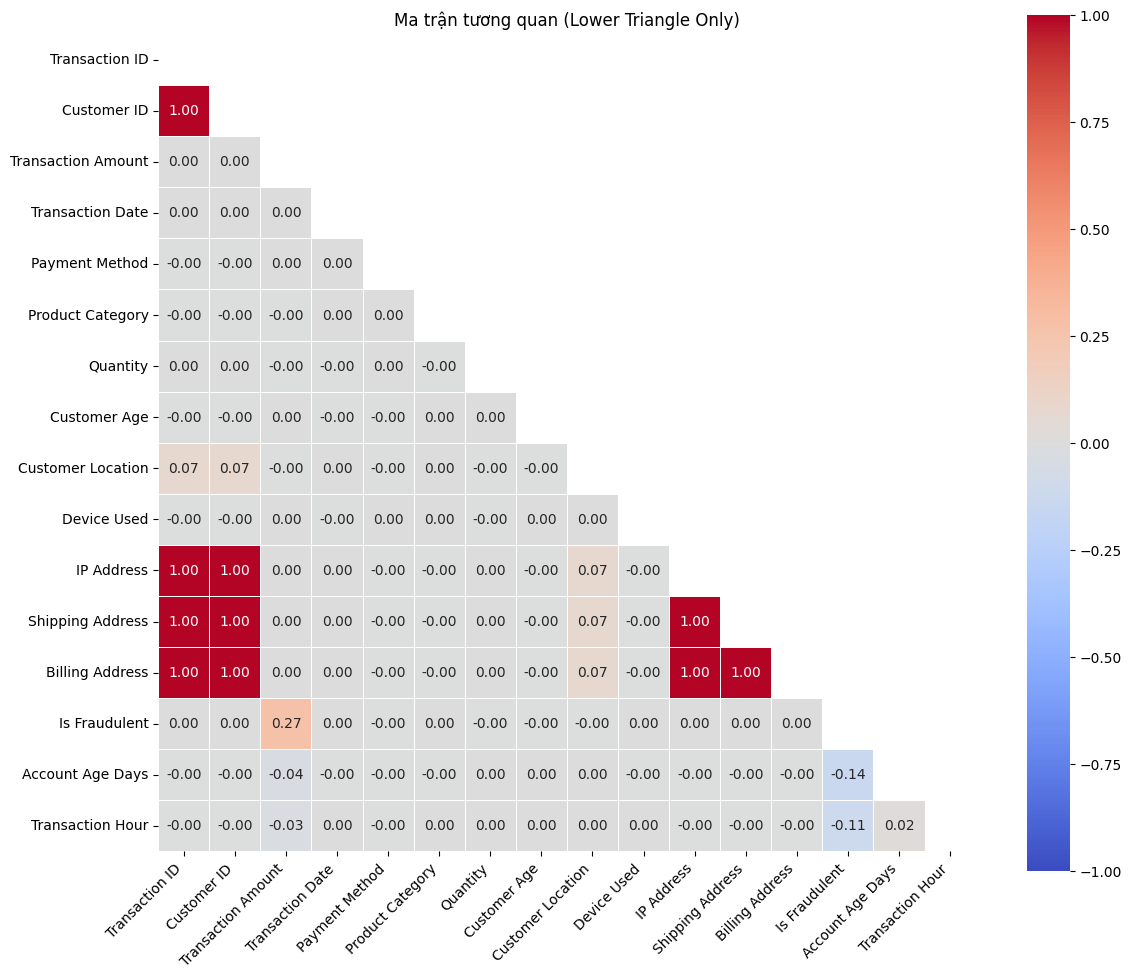

In [13]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

for col in df.columns:
    if df[col].dtype == 'object':
        df[col], _ = pd.factorize(df[col])

corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            mask=mask,        # Ẩn tam giác trên
            annot=True,       # Hiển thị giá trị trên từng ô
            fmt=".2f",        # Định dạng 2 chữ số thập phân cho giá trị
            cmap="coolwarm", 
            vmin=-1, vmax=1, 
            square=True, 
            linewidths=.5)
plt.title("Ma trận tương quan (Lower Triangle Only)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Số lượng giao dịch theo nhãn 'Is Fraudulent':
 Is Fraudulent
0    1399114
1      73838
Name: count, dtype: int64

Phần trăm giao dịch theo nhãn 'Is Fraudulent':
 Is Fraudulent
0    94.987074
1     5.012926
Name: proportion, dtype: float64


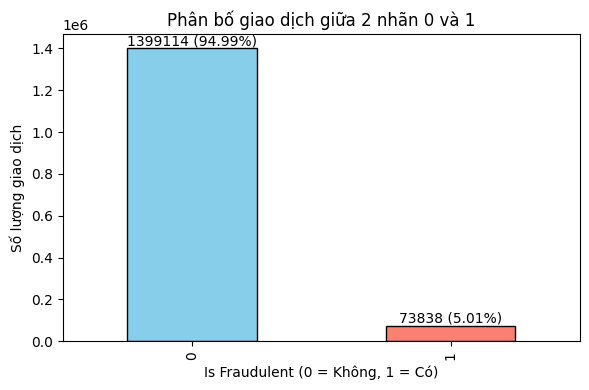

In [14]:
fraud_counts = df['Is Fraudulent'].value_counts()
# Tính phần trăm tương ứng cho mỗi nhãn
fraud_percent = df['Is Fraudulent'].value_counts(normalize=True) * 100

# In kết quả ra console
print("Số lượng giao dịch theo nhãn 'Is Fraudulent':\n", fraud_counts)
print("\nPhần trăm giao dịch theo nhãn 'Is Fraudulent':\n", fraud_percent)

# Vẽ biểu đồ cột
plt.figure(figsize=(6, 4))
bars = fraud_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.xlabel("Is Fraudulent (0 = Không, 1 = Có)")
plt.ylabel("Số lượng giao dịch")
plt.title("Phân bố giao dịch giữa 2 nhãn 0 và 1")

# Hiển thị số lượng và phần trăm trên từng cột
for index, value in enumerate(fraud_counts):
    plt.text(index, value, f"{value} ({fraud_percent.iloc[index]:.2f}%)", 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [15]:
# 3. Xác định target label và số lượng top cần lấy
target_label = 1
top_n = 5  # Lấy top 5 giá trị phổ biến nhất

# 4. Danh sách các feature cần phân tích
features_to_check = [
    'Transaction Amount',
    'Transaction Date',
    'Payment Method',
    'Product Category',
    'Quantity',
    'Customer Age',
    'Customer Location',
    'Device Used',
    'IP Address',
    'Shipping Address',
    'Billing Address',
    'Account Age Days',
    'Transaction Hour'
]

# 5. Lọc dữ liệu chỉ giữ các giao dịch có Is Fraudulent == 1
fraud_df = df[df['Is Fraudulent'] == target_label]
total_fraud = len(fraud_df)

print(f"\n Top {top_n} giá trị phổ biến nhất cho từng feature khi Is Fraudulent == {target_label}\n")
for feature in features_to_check:
    print(f" Feature: {feature}")
    
    # Nếu feature là "Transaction Date", chuyển sang datetime (nếu chưa) và chỉ lấy phần ngày
    if feature == "Transaction Date":
        # Kiểm tra kiểu và chuyển đổi nếu cần
        if not pd.api.types.is_datetime64_any_dtype(fraud_df[feature]):
            fraud_df[feature] = pd.to_datetime(fraud_df[feature], errors='coerce')
        # Lấy phần ngày và tính tần số
        top_values = fraud_df[feature].dt.date.value_counts().head(top_n)
    else:
        top_values = fraud_df[feature].value_counts().head(top_n)
    
    # In ra từng giá trị với số lượng và phần trăm trên tổng số giao dịch gian lận
    for value, count in top_values.items():
        percent = (count / total_fraud) * 100
        print(f"  - {value}: {count} giao dịch ({percent:.2f}%)")
    print()  # Dòng trống để dễ đọc


 Top 5 giá trị phổ biến nhất cho từng feature khi Is Fraudulent == 1

 Feature: Transaction Amount
  - 172.65: 10 giao dịch (0.01%)
  - 16.51: 9 giao dịch (0.01%)
  - 26.89: 9 giao dịch (0.01%)
  - 139.5: 8 giao dịch (0.01%)
  - 147.05: 8 giao dịch (0.01%)

 Feature: Transaction Date
  - 2024-03-21: 843 giao dịch (1.14%)
  - 2024-01-22: 840 giao dịch (1.14%)
  - 2024-03-08: 837 giao dịch (1.13%)
  - 2024-01-27: 836 giao dịch (1.13%)
  - 2024-03-14: 832 giao dịch (1.13%)

 Feature: Payment Method
  - 0: 18560 giao dịch (25.14%)
  - 1: 18488 giao dịch (25.04%)
  - 2: 18477 giao dịch (25.02%)
  - 3: 18313 giao dịch (24.80%)

 Feature: Product Category
  - 3: 14854 giao dịch (20.12%)
  - 4: 14821 giao dịch (20.07%)
  - 2: 14811 giao dịch (20.06%)
  - 1: 14726 giao dịch (19.94%)
  - 0: 14626 giao dịch (19.81%)

 Feature: Quantity
  - 2: 14998 giao dịch (20.31%)
  - 4: 14856 giao dịch (20.12%)
  - 1: 14816 giao dịch (20.07%)
  - 5: 14662 giao dịch (19.86%)
  - 3: 14506 giao dịch (19.65%)

 

/tmp/ipykernel_353421/1615886917.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Fraudulent', y=feature, data=df, palette="Set2")


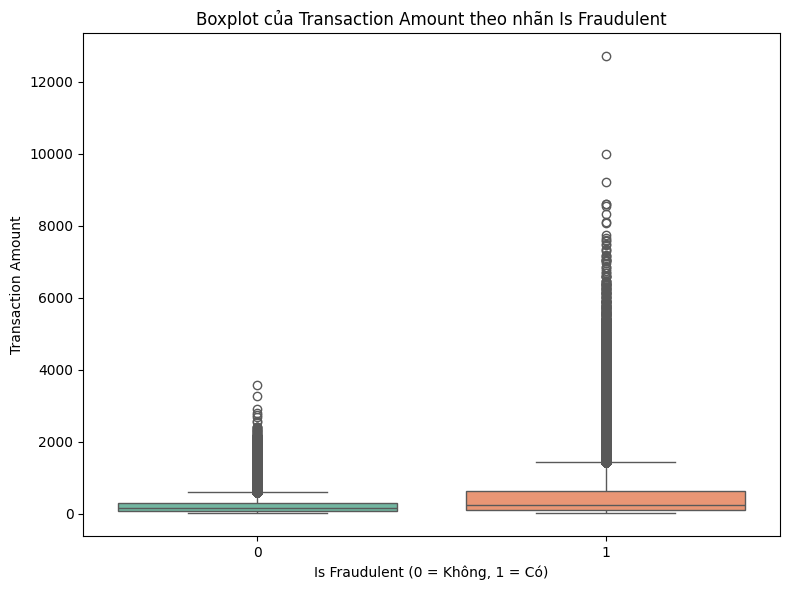

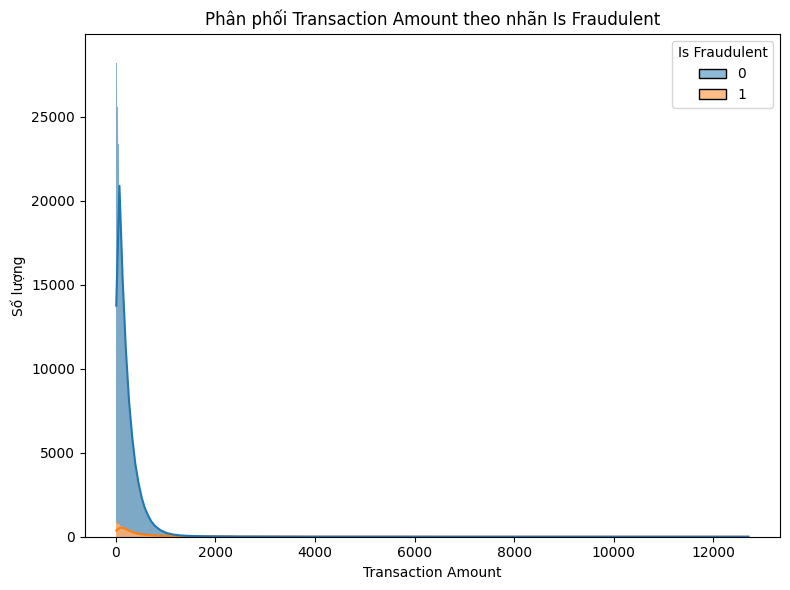

/tmp/ipykernel_353421/1615886917.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Fraudulent', y=feature, data=df, palette="Set2")


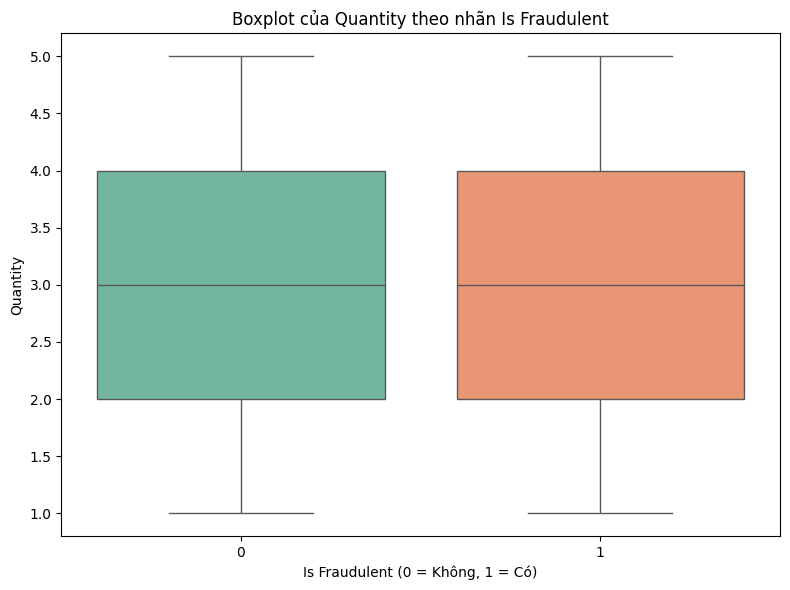

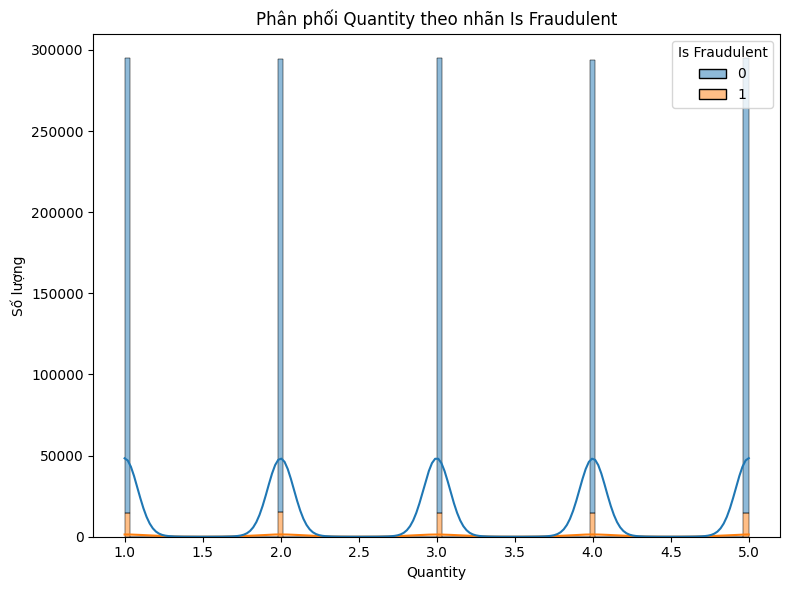

/tmp/ipykernel_353421/1615886917.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Fraudulent', y=feature, data=df, palette="Set2")


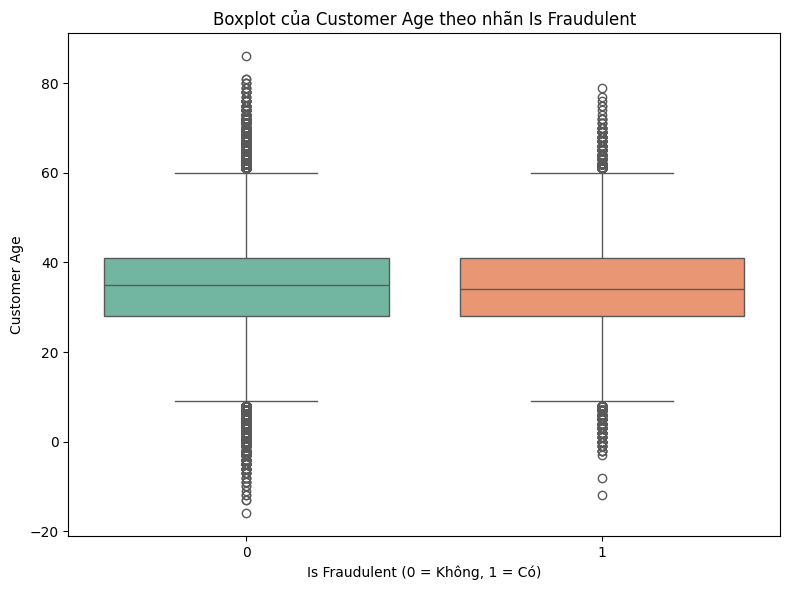

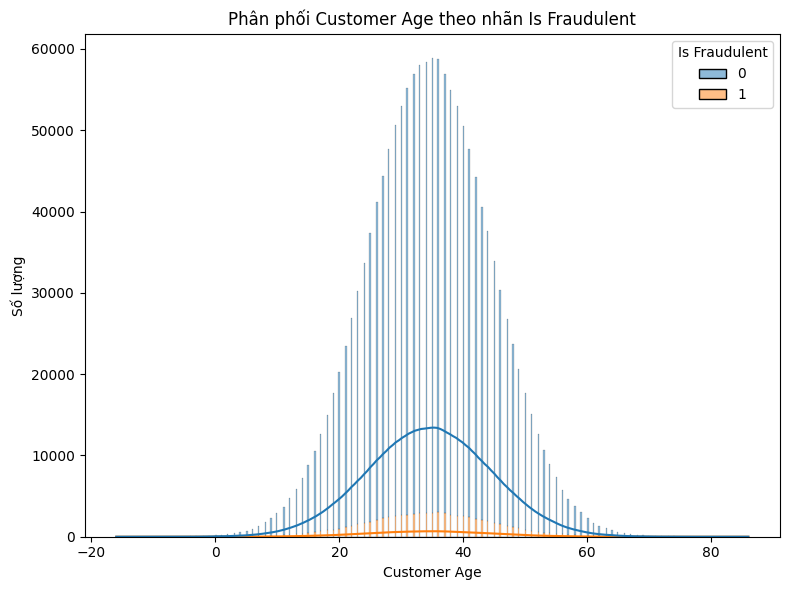

/tmp/ipykernel_353421/1615886917.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Fraudulent', y=feature, data=df, palette="Set2")


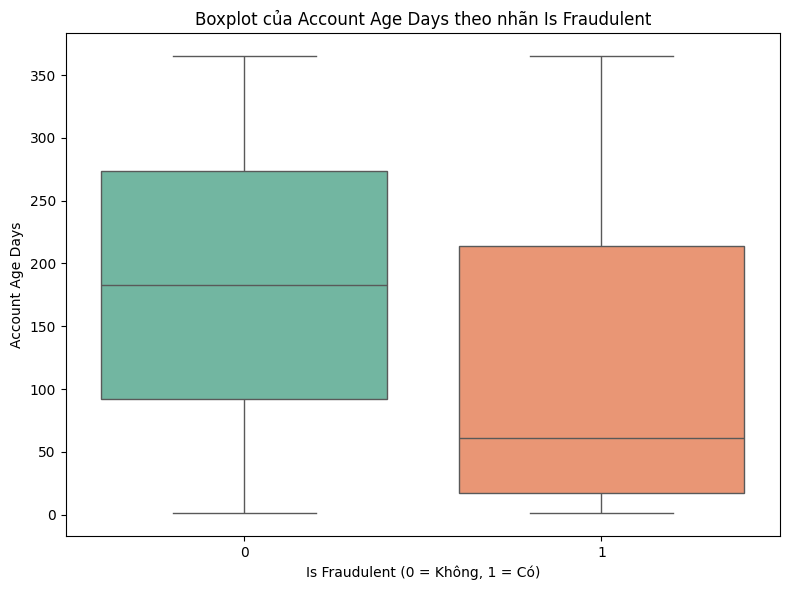

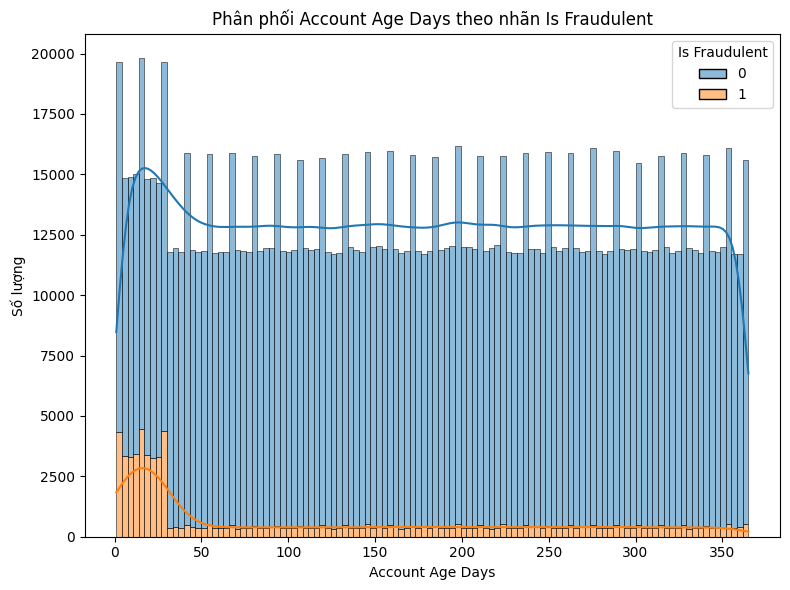

/tmp/ipykernel_353421/1615886917.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is Fraudulent', y=feature, data=df, palette="Set2")


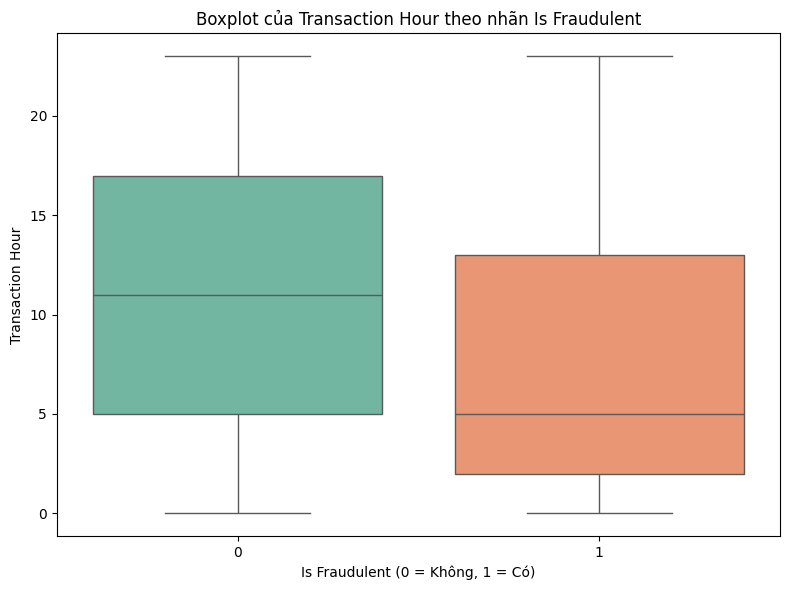

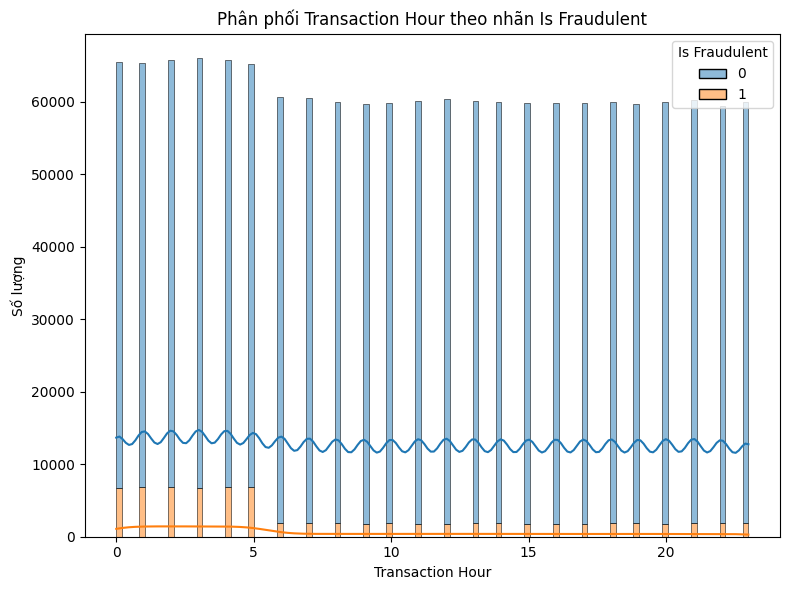

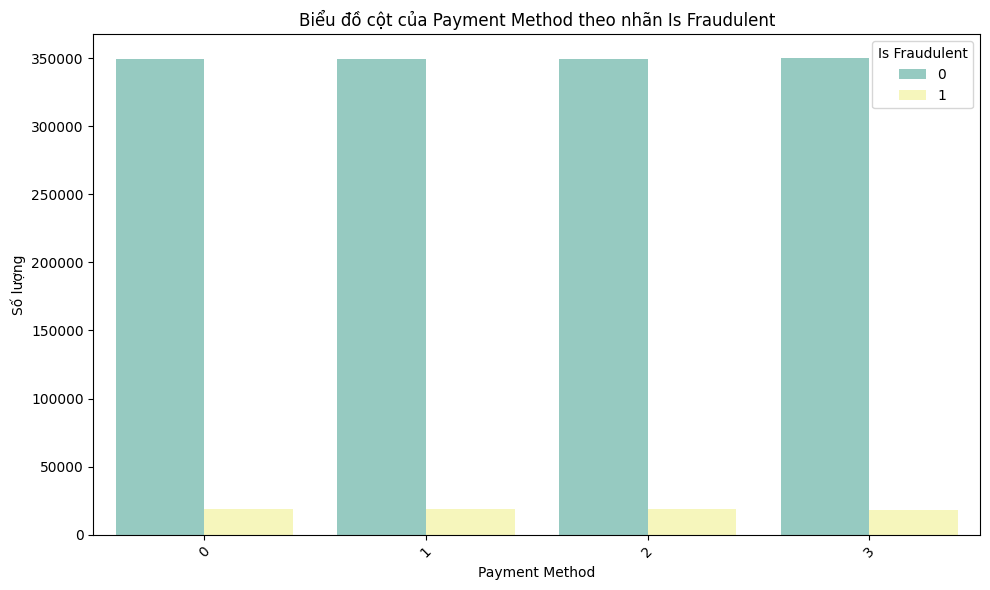

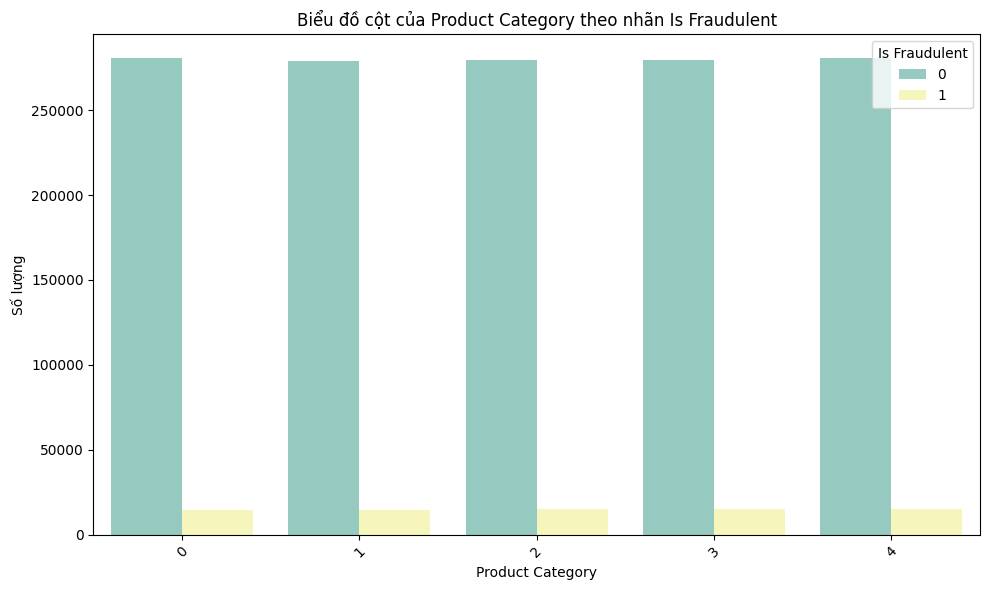

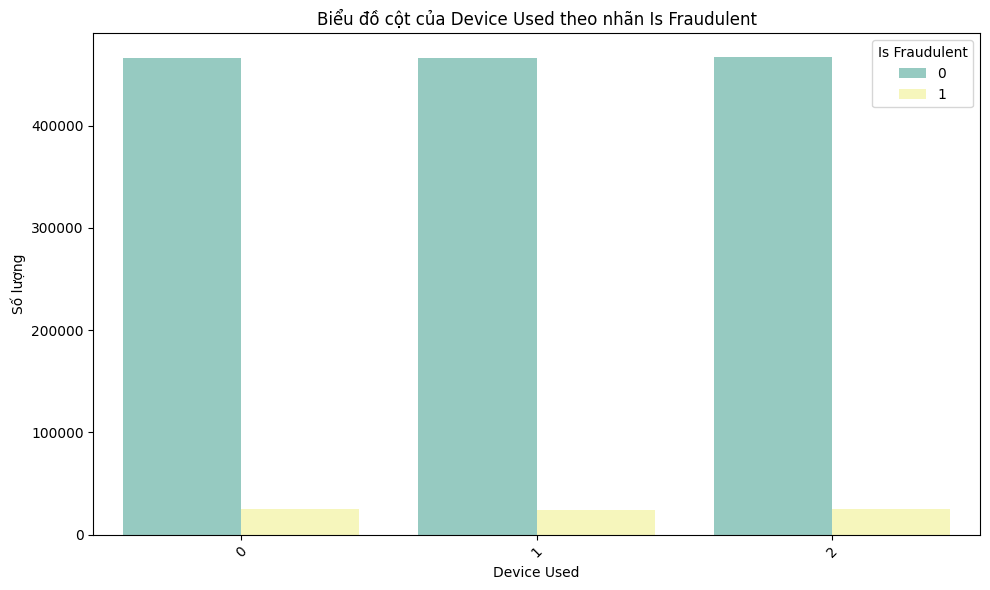

In [16]:
numeric_features = ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour']
categorical_features = ['Payment Method', 'Product Category', 'Device Used']

# 5. Biểu đồ cho các feature số: Vẽ boxplot và histogram theo nhãn "Is Fraudulent"
for feature in numeric_features:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Is Fraudulent', y=feature, data=df, palette="Set2")
    plt.title(f"Boxplot của {feature} theo nhãn Is Fraudulent")
    plt.xlabel("Is Fraudulent (0 = Không, 1 = Có)")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(8,6))
    sns.histplot(data=df, x=feature, hue="Is Fraudulent", multiple="stack", kde=True)
    plt.title(f"Phân phối {feature} theo nhãn Is Fraudulent")
    plt.xlabel(feature)
    plt.ylabel("Số lượng")
    plt.tight_layout()
    plt.show()

# 6. Biểu đồ cho các feature định tính: Vẽ countplot theo nhãn "Is Fraudulent"
for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(x=feature, hue="Is Fraudulent", data=df, palette="Set3")
    plt.title(f"Biểu đồ cột của {feature} theo nhãn Is Fraudulent")
    plt.xlabel(feature)
    plt.ylabel("Số lượng")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()